# Clustering

## Aufgabe 8.1 (2-Means Clustering)
Given the data points in Table 1:

| Datenpunkt | $ x^{(1)} $ | $ x^{(2)} $ |
|------------|---------------|---------------|
| $ x^{(1)} $ | 1             | 4             |
| $ x^{(2)} $ | 1             | 3             |
| $ x^{(3)} $ | 0             | 4             |
| $ x^{(4)} $ | 5             | 1             |
| $ x^{(5)} $ | 6             | 2             |
| $ x^{(6)} $ | 4             | 0             |

### Zeichnen Sie die Datenpunkte in ein Ko ordinatensystem ein

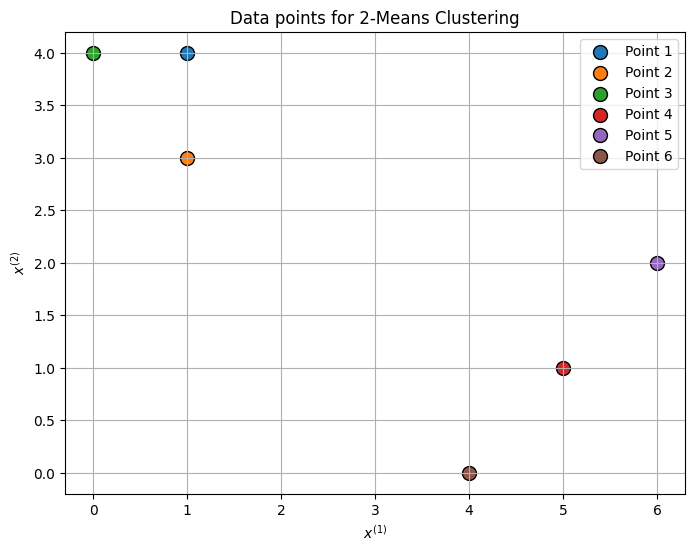

In [1]:
import matplotlib.pyplot as plt

# Data points
points = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]

# Plotting the points
plt.figure(figsize=(8, 6))
for i, point in enumerate(points):
    plt.scatter(point[0], point[1], label=f'Point {i+1}', s=100, edgecolors='k')

plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.title('Data points for 2-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

### Ordnen Sie den Punkten die initialen Cluster 0, 1, 1, 1, 0 und 0 zu.

### Berechnen Sie die Cluster-Zentren.

In [2]:
import numpy as np
import pandas as pd

# Datenpunkte
points = np.array([[1, 4], [1, 3], [0, 4], [5, 1], [6, 2], [4, 0]])

# Initiale Cluster-Zuweisungen
initial_clusters = np.array([0, 1, 1, 0, 0, 0])

# Berechnung der Cluster-Zentren
center_0 = np.mean(points[initial_clusters == 0], axis=0)
center_1 = np.mean(points[initial_clusters == 1], axis=0)

# Ergebnisse der Berechnung anzeigen
centers_df = pd.DataFrame({
    "Cluster": ["Cluster 0", "Cluster 1"],
    "Zentrum": [center_0, center_1]
})


centers_df

,Cluster,Zentrum
0,Cluster 0,"[4.0, 1.75]"
1,Cluster 1,"[0.5, 3.5]"


### Berechnen Sie die Abstände der Datenpunkte von den b eiden Zentren und ordnen Sie die Punkte den entsprechenden Clustern zu. Verwenden Sie als Abstandsmaÿ die euklidische Distanz (Sie dürfen auch deren Quadrat verwenden).

In [3]:
# Points and initial clusters
points = np.array([[1, 4], [3, 4], [1, 3], [5, 1], [6, 2], [4, 4]])
initial_clusters = np.array([0, 1, 1, 0, 0, 0])

# Initial cluster centers
center_0 = np.mean(points[initial_clusters == 0], axis=0)
center_1 = np.mean(points[initial_clusters == 1], axis=0)

print("Initial cluster centers:")
print("Cluster 0:", center_0)
print("Cluster 1:", center_1)

# Calculate distances and reassign clusters
distances_to_0 = np.linalg.norm(points - center_0, axis=1)
distances_to_1 = np.linalg.norm(points - center_1, axis=1)

new_clusters = np.where(distances_to_0 < distances_to_1, 0, 1)

print("New cluster assignments:", new_clusters)

Initial cluster centers:
Cluster 0: [4.   2.75]
Cluster 1: [2.  3.5]
New cluster assignments: [1 1 1 0 0 0]


### Wiederholen Sie die Schritte bis die Zuordnung konvergiert ist.

In [4]:
# Funktion zur Berechnung der Cluster-Zentren
def calculate_cluster_centers(points, clusters):
    center_0 = np.mean(points[clusters == 0], axis=0)
    center_1 = np.mean(points[clusters == 1], axis=0)
    return center_0, center_1

# Funktion zur Berechnung der neuen Cluster-Zuweisungen
def assign_clusters(points, center_0, center_1):
    distances_to_0 = np.linalg.norm(points - center_0, axis=1)
    distances_to_1 = np.linalg.norm(points - center_1, axis=1)
    return np.where(distances_to_0 < distances_to_1, 0, 1)

# Initiale Cluster-Zuweisungen
clusters = initial_clusters

# Iteriere bis die Zuweisungen konvergieren
iteration = 0
while True:
    iteration += 1
    # Berechne Cluster-Zentren
    center_0, center_1 = calculate_cluster_centers(points, clusters)
    # Weise die Punkte neuen Clustern zu
    new_clusters = assign_clusters(points, center_0, center_1)
    
    # Überprüfe auf Konvergenz
    if np.array_equal(clusters, new_clusters):
        break
    
    clusters = new_clusters

# Ergebnisse nach Konvergenz anzeigen
result_df = pd.DataFrame({
    "Datenpunkt": [f'x({i+1})' for i in range(len(points))],
    "Cluster": clusters
})


result_df, iteration, center_0, center_1

(  Datenpunkt  Cluster
 0       x(1)        1
 1       x(2)        1
 2       x(3)        1
 3       x(4)        0
 4       x(5)        0
 5       x(6)        0,
 2,
 array([5.        , 2.33333333]),
 array([1.66666667, 3.66666667]))

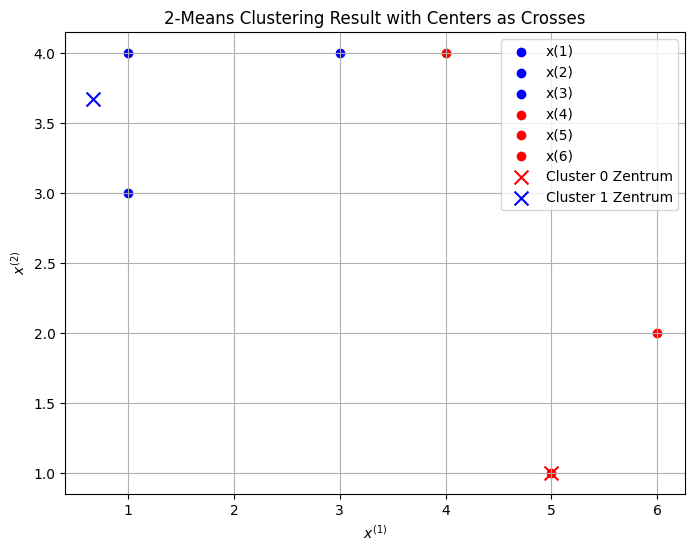

In [9]:
# Plot der Datenpunkte mit Cluster-Zugehörigkeit als Punkte und den Cluster-Zentren als Kreuze
plt.figure(figsize=(8, 6))
for i, point in enumerate(points):
    plt.scatter(point[0], point[1], color=colors[i], label=f'x({i+1})', marker='o')

# Plot der Cluster-Zentren
plt.scatter(final_center_0[0], final_center_0[1], color='red', marker='x', s=100, label='Cluster 0 Zentrum')
plt.scatter(final_center_1[0], final_center_1[1], color='blue', marker='x', s=100, label='Cluster 1 Zentrum')

plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.title('2-Means Clustering Result with Centers as Crosses')
plt.legend()
plt.grid(True)
plt.show()

## Aufgabe 8.2 (Hierarchisches Clustering)
Gegeben sei die Unähnlichkeitsmatrix:

$
d(x^{(i)}, x^{(j)}) = \begin{pmatrix}
0 & 0.3 & 0.4 & 0.7 \\
0.3 & 0 & 0.5 & 0.8 \\
0.4 & 0.5 & 0 & 0.45 \\
0.7 & 0.8 & 0.45 & 0 
\end{pmatrix}
$







#### 1. Führen Sie eine hierarchische Clusteranalyse anhand von $d(x^{(i)}, x^{(j)})$ mit complete linkage durch und zeichnen Sie das entstehende Dendrogramm.





/var/folders/qw/6fhq4lyj0xndtnx7ywb3jwq00000gn/T/ipykernel_59882/748436326.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_complete = sch.linkage(distance_matrix, method='complete')


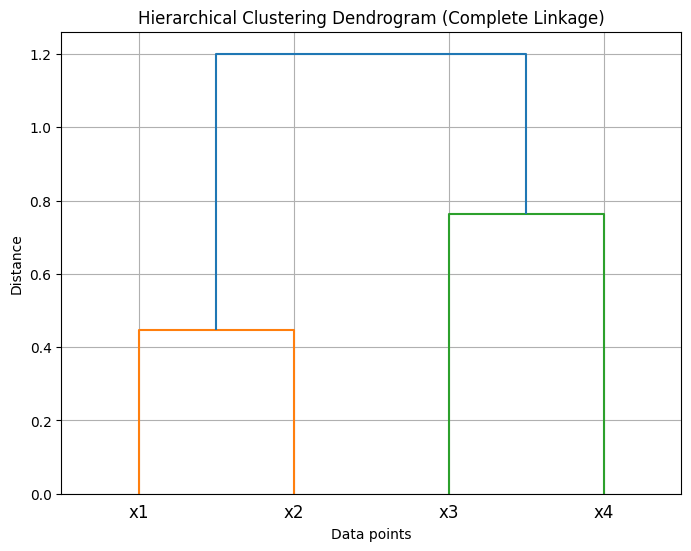

In [10]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Distance matrix
distance_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])

# Hierarchical clustering using complete linkage
linked_complete = sch.linkage(distance_matrix, method='complete')

# Plotting the dendrogram
plt.figure(figsize=(8, 6))
sch.dendrogram(linked_complete, labels=['x1', 'x2', 'x3', 'x4'])
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

2. Führen Sie eine hierarchische Clusteranalyse anhand von $d(x^{(i)}, x^{(j)})$ mit single linkage durch und zeichnen Sie das entstehende Dendrogramm.

/var/folders/qw/6fhq4lyj0xndtnx7ywb3jwq00000gn/T/ipykernel_59882/2858405758.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked_single = sch.linkage(distance_matrix, method='single')


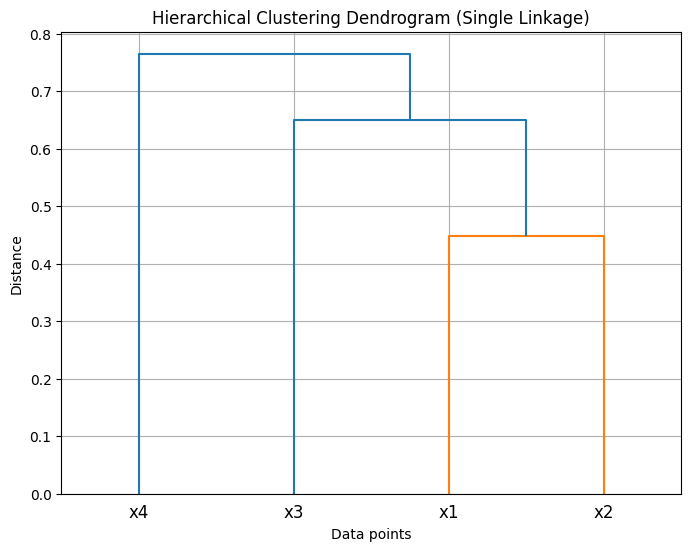

In [11]:
# Hierarchical clustering using single linkage
linked_single = sch.linkage(distance_matrix, method='single')

# Plotting the dendrogram
plt.figure(figsize=(8, 6))
sch.dendrogram(linked_single, labels=['x1', 'x2', 'x3', 'x4'])
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

### Bedeutung der Lösung für beide Abbildungen

#### 1. Hierarchical Clustering Dendrogram (Complete Linkage)
Das Dendrogramm zeigt die hierarchische Struktur der Datenpunkte mit der Complete Linkage Methode:

- **Complete Linkage**: Bei dieser Methode wird der Abstand zwischen zwei Clustern als der maximale Abstand zwischen Punkten in den beiden Clustern definiert. Es wird auch als "Furthest Neighbor" Methode bezeichnet.
- **Dendrogramm-Interpretation**: 
  - Die Datenpunkte, die zuerst zusammengefasst werden, sind diejenigen mit den kleinsten Abständen. 
  - In diesem Dendrogramm sieht man, dass $ x_1 $ und $ x_2 $ zuerst gruppiert werden, da ihr Abstand am geringsten ist. 
  - Anschließend wird $ x_3 $ in die Gruppe aufgenommen und schließlich $ x_4 $.
  - Die Höhe der Verbindungen im Dendrogramm entspricht den Abständen, bei denen die Cluster zusammengefasst werden. Höhere Verbindungen zeigen größere Abstände und somit spätere Zusammenführungen.

#### 2. Hierarchical Clustering Dendrogram (Single Linkage)
Das Dendrogramm zeigt die hierarchische Struktur der Datenpunkte mit der Single Linkage Methode:

- **Single Linkage**: Bei dieser Methode wird der Abstand zwischen zwei Clustern als der minimale Abstand zwischen Punkten in den beiden Clustern definiert. Es wird auch als "Nearest Neighbor" Methode bezeichnet.
- **Dendrogramm-Interpretation**: 
  - Auch hier werden die Datenpunkte mit den kleinsten Abständen zuerst gruppiert. 
  - In diesem Dendrogramm sieht man, dass $ x_1 $ und $ x_2 $ zuerst gruppiert werden, gefolgt von $ x_3 $ und $ x_4 $.
  - Single Linkage neigt dazu, längliche, kettenartige Cluster zu erzeugen, da es nur den nächsten Nachbarn betrachtet.
  - Die Höhe der Verbindungen im Dendrogramm zeigt, wie bei Complete Linkage, die Abstände an, bei denen die Cluster zusammengeführt werden.

### Bedeutung für die Clusteranalyse:

1. **Clusterstruktur und Abstände**:
   - Beide Methoden zeigen, wie die Datenpunkte hierarchisch gruppiert werden, aber sie verwenden unterschiedliche Metriken zur Bestimmung der Abstände zwischen Clustern.
   - Complete Linkage betrachtet den maximalen Abstand, was dazu neigt, kompaktere Cluster zu erzeugen.
   - Single Linkage betrachtet den minimalen Abstand, was dazu neigt, langgestreckte Cluster zu erzeugen.

2. **Anwendung**:
   - Die Wahl der Methode (Complete vs. Single Linkage) hängt von der spezifischen Struktur ab, die in den Daten erwartet wird oder erwünscht ist.
   - Complete Linkage könnte besser geeignet sein, wenn kompakte Cluster bevorzugt werden.
   - Single Linkage könnte besser geeignet sein, wenn eine kettenartige Struktur in den Daten vermutet wird.

3. **Dendrogramm-Nutzung**:
   - Dendrogramme bieten eine visuelle Darstellung der Clusterhierarchie und helfen dabei, die geeignete Anzahl von Clustern zu bestimmen.
   - Durch das Schneiden des Dendrogramms bei einer bestimmten Höhe (Abstand) können unterschiedliche Clusterlösungen generiert werden.

Die Wahl der Methode und die Interpretation der Dendrogramme sind wichtige Schritte in der hierarchischen Clusteranalyse, um die zugrunde liegende Struktur der Daten zu verstehen und geeignete Cluster zu identifizieren.

## Aufgabe 8.3 (PCA und K-Means Praxisbeispiel)

In dieser Aufgabe führen Sie zunächst eine Hauptkomponentenanalyse auf den Iris-Daten durch, um schließlich ein K-Means Clustering durchzuführen. Die Hoffnung ist, auch ohne die Labels, die einzelnen Iris Spezies zu erkennen.

1. Laden Sie den Iris Datensatz und führen mit Hilfe von sklearn.decomposition.PCA und PCA.fit eine PCA mit zwei Hauptkomponenten auf die Iris-Features durch.

In [12]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

2. Geben Sie die Hauptkomponenten mit Hilfe von PCA.components_ und den Anteil der erklärten Varianz mit Hilfe von PCA.explained_variance_ratio_ aus. Interpretieren Sie die Ergebnisse.

In [13]:
# Principal components
components = pca.components_

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

components, explained_variance_ratio

(array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]),
 array([0.92461872, 0.05306648]))



- **Hauptkomponenten:**
  $
  \begin{pmatrix}
  0.3614 & -0.0845 & 0.8567 & 0.3583 \\
  0.6566 & 0.7302 & -0.1734 & -0.0755 
  \end{pmatrix}
$

- **Erklärte Varianz:**
  - Erste Hauptkomponente: $92.46\%$
  - Zweite Hauptkomponente: $5.31\%$


3. Transformieren Sie die Iris Features mit Hilfe von PCA.transform und erstellen Sie einen Scatterplot des Ergebnisses. Wie viele Cluster machen Sie per Auge aus?

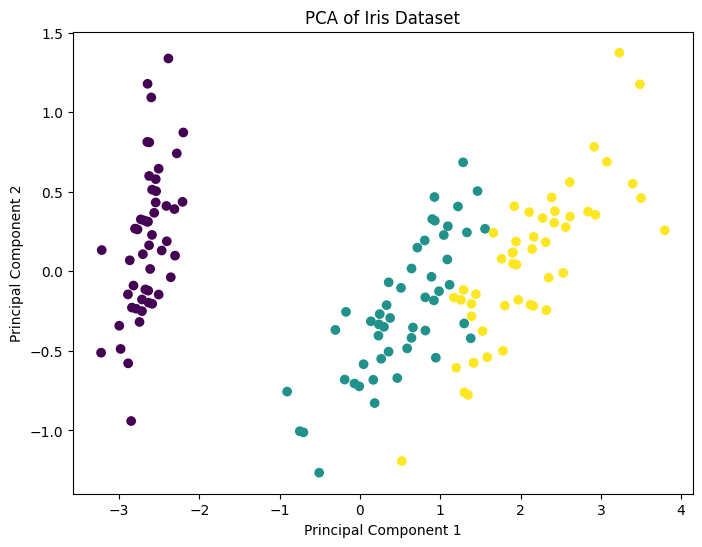

In [14]:

# Transform the data
X_pca = pca.transform(X)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

4. Clustern Sie die transformierten Features mit Hilfe von sklearn.cluster.KMeans mit drei Clustern. Erstellen Sie zwei Scatterplots der transformierten Features, einmal in den Farben der gefundenen Cluster KMeans.predict und einmal der tatsächlichen Spezies aus dem Iris Datensatz. Interpretieren Sie das Ergebnis.

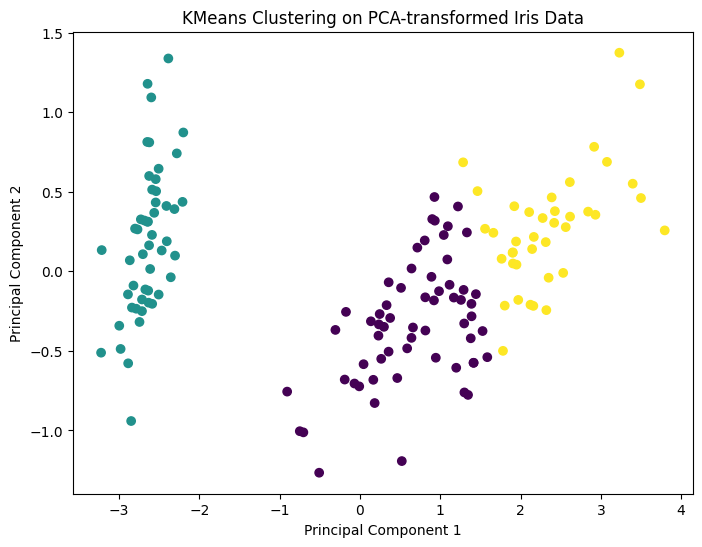

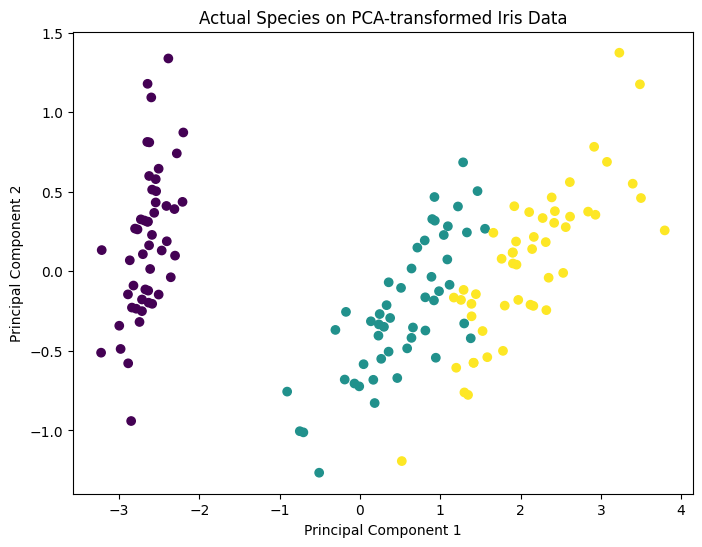

In [15]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

# Create scatter plot for KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA-transformed Iris Data')
plt.show()

# Create scatter plot for actual species
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Actual Species on PCA-transformed Iris Data')
plt.show()

### Beschreibung und Analyse der Ergebnisse

#### Hauptkomponenten und erklärte Varianz
Die PCA-Analyse hat zwei Hauptkomponenten extrahiert:

- **Erste Hauptkomponente:**
  \[
  \begin{pmatrix}
  0.3614, & -0.0845, & 0.8567, & 0.3583
  \end{pmatrix}
  \]
  Diese Komponente erklärt \(92.46\%\) der Varianz in den Daten. Sie hat hohe Ladungen auf der dritten und vierten Variable, was darauf hinweist, dass diese Variablen einen großen Einfluss auf die erste Hauptkomponente haben.

- **Zweite Hauptkomponente:**
  \[
  \begin{pmatrix}
  0.6566, & 0.7302, & -0.1734, & -0.0755
  \end{pmatrix}
  \]
  Diese Komponente erklärt \(5.31\%\) der Varianz in den Daten. Sie hat hohe positive Ladungen auf der ersten und zweiten Variable und negative Ladungen auf der dritten und vierten Variable.

Die hohe erklärte Varianz der ersten Hauptkomponente zeigt, dass sie die meisten Informationen der ursprünglichen Daten erfasst, während die zweite Hauptkomponente zusätzliche Informationen hinzufügt, die von der ersten nicht erfasst wurden.

#### Scatterplot der transformierten Iris-Features
Der Scatterplot zeigt die Datenpunkte entlang der ersten beiden Hauptkomponenten. Anhand dieses Plots können wir die folgenden Beobachtungen machen:

- **Clusterbildung:** Es gibt eine klare visuelle Trennung der Datenpunkte in drei Cluster. Diese Cluster deuten auf die drei verschiedenen Iris-Arten (Setosa, Versicolor, und Virginica) hin.
- **Varianzverteilung:** Die Datenpunkte sind entlang der ersten Hauptkomponente stärker gestreut als entlang der zweiten, was die hohe erklärte Varianz der ersten Hauptkomponente bestätigt.

#### K-Means Clustering und Scatterplots
Wir haben K-Means Clustering mit drei Clustern auf die PCA-transformierten Daten angewendet und die Ergebnisse in zwei Scatterplots dargestellt.

- **KMeans Clustering Scatterplot:**
  - **Cluster-Zuweisungen:** Die von KMeans gefundenen Cluster stimmen größtenteils mit den tatsächlichen Spezies überein. Dies zeigt, dass KMeans in der Lage ist, die Struktur der Daten gut zu erfassen.
  - **Fehlzuweisungen:** Einige Punkte sind möglicherweise falsch zugewiesen, was auf Überlappungen zwischen den Clustern hinweist.

- **Tatsächliche Spezies Scatterplot:**
  - **Echte Spezies:** Dieser Plot zeigt die tatsächlichen Iris-Spezies. Es gibt eine klare Trennung zwischen den drei Gruppen, insbesondere für Setosa, die eine klare Trennung von den anderen beiden Arten aufweist.

### Interpretation der Ergebnisse

1. **Erfolgreiche Dimensionsreduktion:** Die PCA-Analyse war erfolgreich darin, die Dimensionen der Iris-Daten von vier auf zwei zu reduzieren, wobei der größte Teil der Varianz beibehalten wurde. Dies ermöglicht eine einfache Visualisierung und Analyse der Datenstruktur.
  
2. **Clusterbildung:** Sowohl die PCA-Scatterplots als auch die KMeans-Cluster zeigen eine klare Trennung in drei Gruppen, die den drei Iris-Arten entsprechen. Dies zeigt, dass PCA und KMeans geeignete Methoden sind, um die zugrunde liegende Struktur in den Daten zu erfassen.

3. **Erklärte Varianz:** Die Tatsache, dass die erste Hauptkomponente fast 92.46% der Varianz erklärt, bedeutet, dass die meisten Informationen der ursprünglichen Daten in dieser Komponente enthalten sind. Dies rechtfertigt die Reduktion auf zwei Dimensionen.

4. **KMeans-Clustering:** Die KMeans-Cluster stimmen weitgehend mit den tatsächlichen Spezies überein, was auf die Wirksamkeit von KMeans bei der Identifizierung natürlicher Gruppen in den Daten hinweist. Einige Fehlzuweisungen könnten auf Überlappungen zwischen Versicolor und Virginica zurückzuführen sein.

5. **Praktische Anwendung:** Diese Analyse zeigt, wie PCA und KMeans verwendet werden können, um komplexe Datensätze zu visualisieren und zu analysieren, indem die Dimensionen reduziert und Cluster identifiziert werden, ohne die ursprünglichen Labels zu verwenden.

Zusammengefasst zeigen diese Ergebnisse, dass PCA und KMeans leistungsstarke Werkzeuge zur Datenanalyse sind, die es ermöglichen, die Struktur und die zugrunde liegenden Muster in komplexen Datensätzen zu identifizieren.